### 1-Dense Layer(1 units) - And/Or Classification
+ AND
    + 0 , 0 => 0
    + 0, 1 => 0
    + 1, 0 => 0
    + 1, 1 => 1

+ OR
    + 0 , 0 => 0
    + 0, 1 => 1
    + 1, 0 => 1
    + 1, 1 => 1

+ XOR (같으면 0, 다르면 1)
    + 0 , 0 => 0
    + 0, 1 => 1
    + 1, 0 => 1
    + 1, 1 => 0

##### 1-Dense Layer(1 units) AND Classification

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#1 dataset 만들기
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)
y_true = np.array([[0],[0],[0],[1]], dtype = np.float32)   # AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32)  # OR

# loss='binary_crossentropy' 사용 시
#y_true = np.array(
#               [[0,0,0,0],
#                [0,0,0,0],
#                [0,0,0,0,],
#                [0,0,0,1]
#               ])

In [4]:
#2 모델 만들기
model = tf.keras.Sequential()
# activation=tf.keras.activations.sigmoid
model.add(tf.keras.layers.Dense(units=1, input_dim=2, activation='sigmoid'))
model.summary()
# param #3 : 입력2, 출력1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [5]:
#3 configure : lr 등 결정, metrics : 평가결과
# model.optimizer.lr: 0.001
##model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
##model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
#4 학습 시키기
ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.2505 - accuracy: 0.5000 - 700ms/epoch - 700ms/step
Epoch 2/100
1/1 - 0s - loss: 0.2130 - accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 3/100
1/1 - 0s - loss: 0.1964 - accuracy: 0.7500 - 0s/epoch - 0s/step
Epoch 4/100
1/1 - 0s - loss: 0.1775 - accuracy: 1.0000 - 16ms/epoch - 16ms/step
Epoch 5/100
1/1 - 0s - loss: 0.1644 - accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 6/100
1/1 - 0s - loss: 0.1536 - accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 7/100
1/1 - 0s - loss: 0.1444 - accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 8/100
1/1 - 0s - loss: 0.1364 - accuracy: 1.0000 - 16ms/epoch - 16ms/step
Epoch 9/100
1/1 - 0s - loss: 0.1293 - accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 10/100
1/1 - 0s - loss: 0.1230 - accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 11/100
1/1 - 0s - loss: 0.1173 - accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 12/100
1/1 - 0s - loss: 0.1121 - accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 13/100
1/1 - 0s - loss: 0.1074 - accuracy: 1.0000 - 0s/epoch - 0s

In [7]:
#5 평가 하기
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
print("test_loss:", test_loss)
print("test_acc:", test_acc)

1/1 - 0s - loss: 0.0048 - accuracy: 1.0000 - 94ms/epoch - 94ms/step
test_loss: 0.004769047722220421
test_acc: 1.0


In [8]:
# 생성모델 테스트(예측)
y_pred = model.predict(X)
print("y_pred:", y_pred)
y_label = (y_pred> 0.5).astype(int) # Z = np.round(Z)
print("y_label:", y_label)

1/1 [==============================] - 0s 47ms/step
y_pred: [[6.4424594e-04]
 [7.6553755e-02]
 [7.6550178e-02]
 [9.1423655e-01]]
y_label: [[0]
 [0]
 [0]
 [1]]


In [10]:
#5: calculate the decision boundary line, w0*x + w1*y + b = 0
##print(model.get_weights())
w0, w1 = model.layers[0].weights[0].numpy().flatten()
b = model.layers[0].bias.numpy()[0]
print("{:>.2f}*x {:+.2f}*y {:+.2f} = 0".format(w0, w1, b))

# param #3
# ax + by + c = 0

4.86*x +4.86*y -7.35 = 0


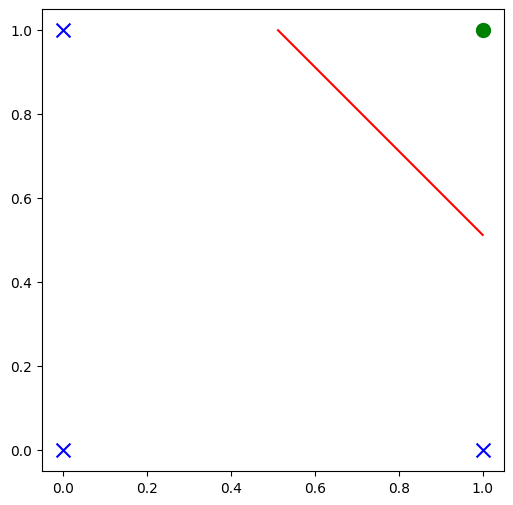

In [13]:
#시각화

fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

label = y_true.flatten()
##plt.scatter(X[:, 0], X[:,1], c=label, s = 100)
plt.scatter(X[label==0, 0], X[label==0, 1], marker='x', c="blue", s= 100)
plt.scatter(X[label==1, 0], X[label==1, 1], marker='o', c="green",s= 100)
##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx', markersize= 10)

def clippingLineBox(line, box):
    w0, w1, b = line
    xmin, xmax, ymin, ymax = box

    y0 =-(w0*xmin + b)/w1
    y1 =-(w0*xmax + b)/w1

    x0 = -(w1*ymin + b)/w0
    x1 = -(w1*ymax + b)/w0

    xpoints = []
    ypoints = []
    if ymin <= y0 <= ymax:
        xpoints.append(xmin)
        ypoints.append(y0)
    if ymin <= y1 <= ymax:
        xpoints.append(xmax)
        ypoints.append(y1)

    if xmin <= x0 <= xmax:
        xpoints.append(x0)
        ypoints.append(ymin)
    if xmin <= x1 <= xmax:
        xpoints.append(x1)
        ypoints.append(ymax)
    return xpoints, ypoints

# clip the line against a box, and draw
xpoints, ypoints = clippingLineBox(line=(w0, w1, b), box=(0, 1, 0, 1))
plt.plot(xpoints, ypoints, color='red')
plt.show()

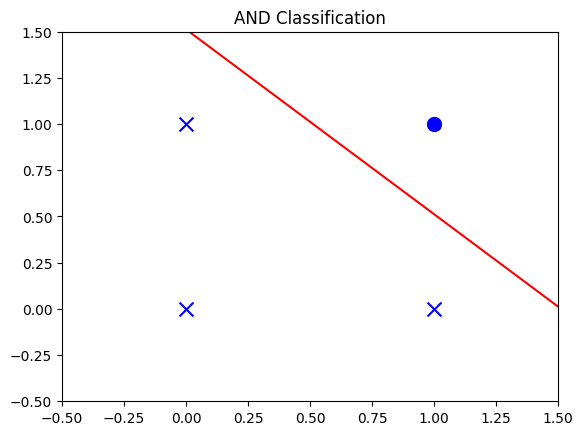

In [17]:
# 시각화 2

first = lambda x: x[0]
second = lambda x: x[1]

def plot_gate(points, y_fn, title):
  fig, ax = plt.subplots()
  for point, marker in points:
    ax.scatter(first(point), second(point), marker=marker, c='blue', s=100)

  x = np.linspace(-.0, 2., 100)
  y = y_fn(x)
  ax.plot(x, y, c='red')

  ax.set_xlim(-.5, 1.5)
  ax.set_ylim(-.5, 1.5)
  ax.set_title(title)
  plt.show()

# w0 * x + w1 * y + b = 0
# y = -w0/w1x - b/w1
y = lambda x: -x*(w0/w1) + (-b/w1)
points = [((1, 1), 'o'), ((0, 0), 'x'), ((0, 1), 'x'), ((1, 0), 'x')]
plot_gate(points, y, 'AND Classification')

##### 1-Dense Layer(1 units) OR Classification

In [19]:
#1 데이터 생성
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

y_true = np.array([[0],[1], [1],[1]], dtype = np.float32)  # OR

In [20]:
#2 모델 생성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=2, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [21]:
#3 configure
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
#4 학습
ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0197 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 0.0191 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 0.0185 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 0.0179 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0174 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.0168 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.0163 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.0158 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.0153 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.0148 - accuracy: 1.0000
Epoch 11/100
1/1 [=================

In [24]:
#4 평가
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
print("test_loss:", test_loss)
print("test_acc:", test_acc)

1/1 - 0s - loss: 9.6822e-04 - accuracy: 1.0000 - 100ms/epoch - 100ms/step
test_loss: 0.0009682246600277722
test_acc: 1.0


In [25]:
# 생성모델 예측
y_pred = model.predict(X)
print("y_pred:", y_pred)
y_label = (y_pred> 0.5).astype(int)
print("y_label:", y_label)

1/1 [==============================] - 0s 31ms/step
y_pred: [[0.00208673]
 [0.99944854]
 [0.9987684 ]
 [1.        ]]
y_label: [[0]
 [1]
 [1]
 [1]]


In [27]:
#5: calculate the decision boundary line, w0*x + w1*y + b = 0
##print(model.get_weights())
w0, w1 = model.layers[0].weights[0].numpy().flatten()
b = model.layers[0].bias.numpy()[0]
print("{:>.2f}*x {:+.2f}*y {:+.2f} = 0".format(w0, w1, b))

12.87*x +13.67*y -6.17 = 0


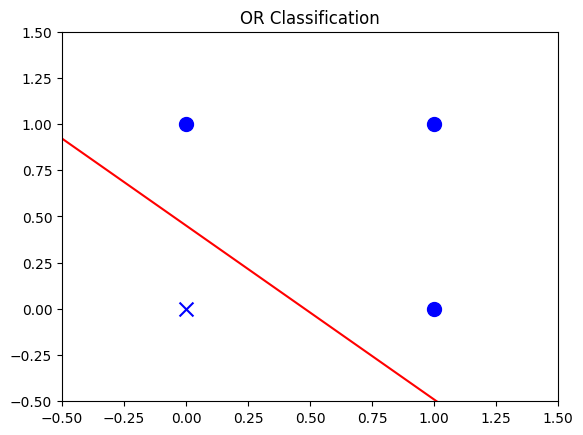

In [28]:
first = lambda x: x[0]
second = lambda x: x[1]

def plot_gate(points, y_fn, title):
  fig, ax = plt.subplots()
  for point, marker in points:
    ax.scatter(first(point), second(point), marker=marker, c='blue', s=100)

  x = np.linspace(-.5, 2., 100)
  y = y_fn(x)
  ax.plot(x, y, c='red')

  ax.set_xlim(-.5, 1.5)
  ax.set_ylim(-.5, 1.5)
  ax.set_title(title)
  plt.show()

# w0 * x + w1 * y + b = 0
# y = -w0/w1x - b/w1
y = lambda x: -x*(w0/w1) + (-b/w1)
points = [((1, 1), 'o'), ((0, 0), 'x'), ((0, 1), 'o'), ((1, 0), 'o')]
plot_gate(points, y, 'OR Classification')

### 1-Dense Layer(2 units) - AND/OR classification

##### 1-Dense Layer(2 units) AND Classification

In [10]:
#1 데이터만들기
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)   # AND
# loss : sparse_categorical_crossentropy
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32)  # OR

In [11]:
#2 모델 만들기
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_dim=2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [12]:
#3 configure
##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt,
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
#4 학습
ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=0)

In [14]:
#5 평가
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].bias.numpy())
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
test_loss

weights: [[-5.1619315  3.6393468]
 [-4.9163556  3.882306 ]]
bias: [ 6.617618 -6.617618]
1/1 - 0s - loss: 0.0091 - accuracy: 1.0000 - 78ms/epoch - 78ms/step


0.009051118046045303

In [15]:
#5 예측

y_pred = model.predict(X)
print("y_pred:", y_pred)

y_label = np.argmax(y_pred, axis = 1)
print("y_label:", y_label)

1/1 [==============================] - 0s 32ms/step
y_pred: [[9.9999821e-01 1.7865253e-06]
 [9.8830205e-01 1.1697954e-02]
 [9.8827177e-01 1.1728240e-02]
 [1.2558691e-02 9.8744130e-01]]
y_label: [0 0 0 1]


313/313 [==============================] - 0s 920us/step


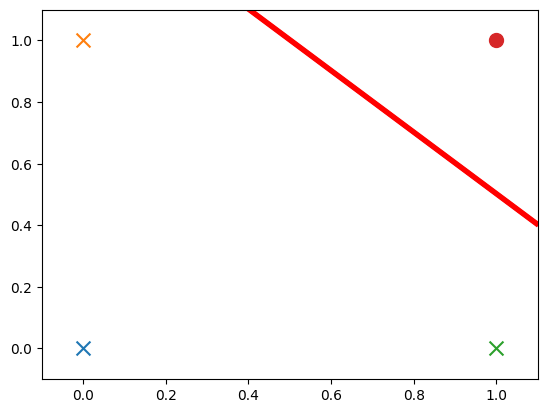

In [17]:
# 시각화
fig, ax = plt.subplots()
plt.scatter(0, 0, marker='x', s = 100)
plt.scatter(0, 1, marker='x', s = 100)
plt.scatter(1, 0, marker='x', s = 100)
plt.scatter(1, 1, marker='o', s = 100)
x = np.linspace(-.1, 1.1, 100)
y = np.linspace(-.1, 1.1, 100)
xx, yy = np.meshgrid(x, y)
sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()

##### 1-Dense Layer(2 units) OR Classification

In [19]:
#1 데이터 만들기
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

y_true = np.array([[0],[1],[1],[1]], dtype = np.float32)
# loss : sparse_categorical_crossentropy
y_true = tf.keras.utils.to_categorical(y_true)
# loss : categorical_crossentropy
print("y_true=", y_true)

y_true= [[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [20]:
#2 모델 만들기
model = tf.keras.Sequential()
# softmax : 1인것은 1에 가깝게, 0인것은 0에 가깝게
model.add(tf.keras.layers.Dense(units=2, input_dim=2, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [21]:
#3 configure
##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
#4 학습
ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 0s/step - loss: 0.0037 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 0.0034 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 0.0033 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.0030 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.0026 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.0025 - accuracy: 1.0000
Epoch 11/100
1/1 [===============

In [24]:
#5 평가
##print(model.get_weights())
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].bias.numpy())

test_loss, test_acc = model.evaluate(X, y_true, verbose=2)

weights: [[-9.040241   7.4162498]
 [-7.61439    8.8148155]]
bias: [ 3.8822842 -3.8823333]
1/1 - 0s - loss: 1.9124e-04 - accuracy: 1.0000 - 94ms/epoch - 94ms/step


In [25]:
#6 예측
y_pred = model.predict(X)
print("y_pred:", y_pred)

y_label = np.argmax(y_pred, axis = 1)
print("y_label:", y_label)

1/1 [==============================] - 0s 31ms/step
y_pred: [[9.99575675e-01 4.24311875e-04]
 [1.72560860e-04 9.99827385e-01]
 [1.67916864e-04 9.99832034e-01]
 [1.23042245e-11 1.00000000e+00]]
y_label: [0 1 1 1]


313/313 [==============================] - 0s 566us/step


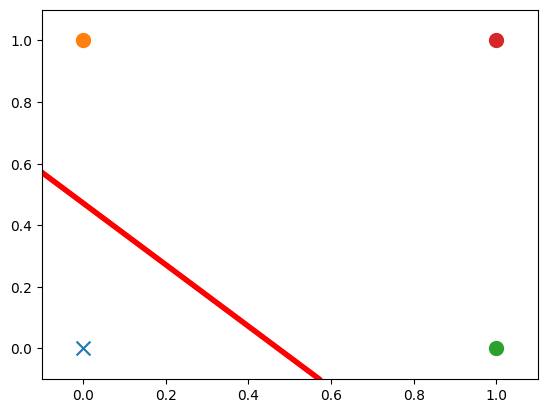

In [26]:
#7 시각화
fig, ax = plt.subplots()
plt.scatter(0, 0, marker='x', s = 100)
plt.scatter(0, 1, marker='o', s = 100)
plt.scatter(1, 0, marker='o', s = 100)
plt.scatter(1, 1, marker='o', s = 100)
x = np.linspace(-.1, 1.1, 100)
y = np.linspace(-.1, 1.1, 100)
xx, yy = np.meshgrid(x, y)
sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()

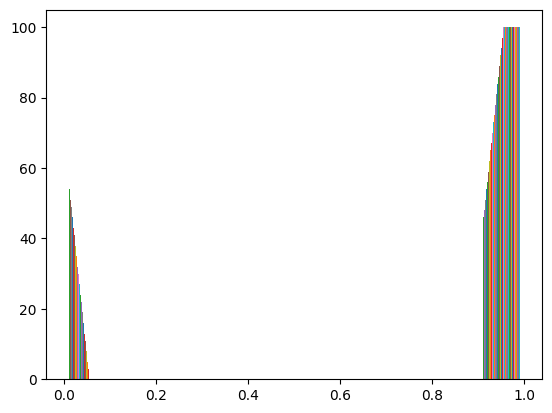

In [29]:
plt.hist(Z)
plt.show()

Text(0.5, 1.0, 'OR Classification')

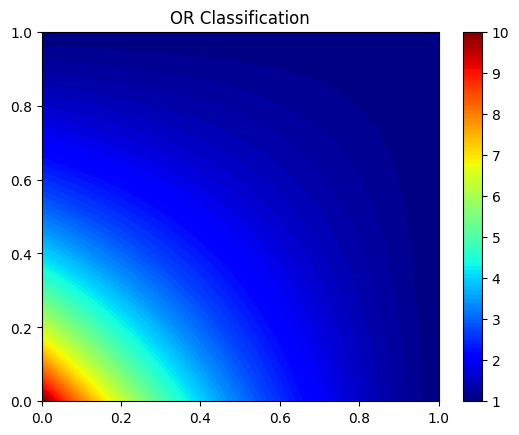

In [30]:
fig, ax = plt.subplots()
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
X,Y = np.meshgrid(x, y)
Z = 10**((X-1)*(Y-1))
con = ax.contourf(X, Y, Z, 100, cmap='jet')
fig.colorbar(con)
ax.set_title('OR Classification')

313/313 [==============================] - 0s 551us/step
(100, 100) (100, 100) (10000, 2) (10000, 2) (10000,)


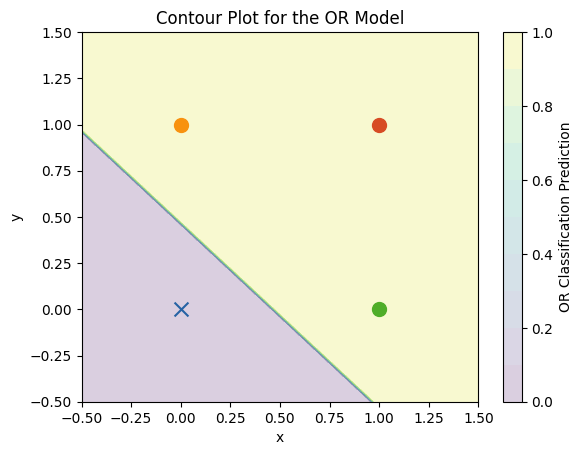

In [31]:
# 시각화 2
first = lambda x: x[0]
second = lambda x: x[1]

def plot_gate_as_contour(model, points, gate='OR'):
    fig, ax = plt.subplots()
    for p, m in points:
      ax.scatter(first(p), second(p), marker=m, s = 100)

    a_range = np.linspace(-.5, 1.5, 100)
    b_range = np.linspace(-.5, 1.5, 100)
    a_grid, b_grid = np.meshgrid(a_range, b_range)

    input_data = np.stack([a_grid.flatten(), b_grid.flatten()], axis=-1)
    results = model.predict(input_data)
    results_1d = np.argmax(results, axis = 1) if 1 < results.shape[1] else np.round(results)
    print(a_grid.shape, b_grid.shape, input_data.shape, results.shape, results_1d.shape)
    grid = results_1d.reshape(a_grid.shape)

    plt.contourf(a_grid, b_grid, grid, levels=10, alpha=.2)
    plt.colorbar(label='{:} Classification Prediction'.format(gate))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Contour Plot for the {:} Model'.format(gate))

    plt.show()

or_points = [((0, 0), 'x'), ((0, 1), 'o'), ((1, 0), 'o'), ((1, 1), 'o')]
plot_gate_as_contour(model, or_points)

### 2-Dense Layer - XOR classification
+ multi-layer, backpropagation

In [45]:
#1 데이터 만들기
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

##y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)# AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32) # OR
y_true = np.array([[0],[1],[1],[0]], dtype = np.float32)   # XOR

In [46]:
#2 모델 만들기
n = 2  # number of neurons in a hidden layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 2)                 6         
                                                                 
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [47]:
#3 configure
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt,loss='mse', metrics=['accuracy'])
##model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
#4 학습
ret = model.fit(X, y_true, epochs=2000, batch_size=4, verbose=2)

Epoch 1/2000
1/1 - 0s - loss: 0.2555 - accuracy: 0.5000 - 219ms/epoch - 219ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.2817 - accuracy: 0.5000 - 16ms/epoch - 16ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.2530 - accuracy: 0.5000 - 0s/epoch - 0s/step
Epoch 4/2000
1/1 - 0s - loss: 0.2504 - accuracy: 0.5000 - 0s/epoch - 0s/step
Epoch 5/2000
1/1 - 0s - loss: 0.2486 - accuracy: 0.5000 - 0s/epoch - 0s/step
Epoch 6/2000
1/1 - 0s - loss: 0.2467 - accuracy: 0.7500 - 13ms/epoch - 13ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.2440 - accuracy: 0.5000 - 0s/epoch - 0s/step
Epoch 8/2000
1/1 - 0s - loss: 0.2406 - accuracy: 0.7500 - 0s/epoch - 0s/step
Epoch 9/2000
1/1 - 0s - loss: 0.2369 - accuracy: 0.7500 - 0s/epoch - 0s/step
Epoch 10/2000
1/1 - 0s - loss: 0.2329 - accuracy: 0.7500 - 0s/epoch - 0s/step
Epoch 11/2000
1/1 - 0s - loss: 0.2289 - accuracy: 0.7500 - 0s/epoch - 0s/step
Epoch 12/2000
1/1 - 0s - loss: 0.2248 - accuracy: 0.7500 - 0s/epoch - 0s/step
Epoch 13/2000
1/1 - 0s - loss: 0.2206 - accuracy: 0.7500 - 

In [49]:
#5 평가
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)

1/1 - 0s - loss: 4.0364e-06 - accuracy: 1.0000 - 63ms/epoch - 63ms/step


In [54]:
# 예측
y_pred = model.predict(X)
print("y_pred:", y_pred)

y_label = (y_pred> 0.5).astype(int)
print("y_label:", y_label)

1/1 [==============================] - 0s 16ms/step
y_pred: [[0.00185526]
 [0.9980958 ]
 [0.99809605]
 [0.00233508]]
y_label: [[0]
 [1]
 [1]
 [0]]


6/6 [==============================] - 0s 3ms/step


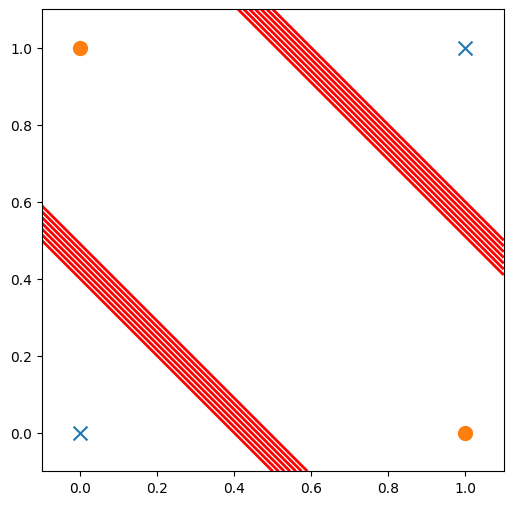

In [51]:
#7 시각화
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

label = y_true.flatten()
plt.scatter(X[label==0, 0], X[label==0,1], marker='x', s = 100)
plt.scatter(X[label==1, 0], X[label==1,1], marker='o', s = 100)
##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx')

h = 0.1
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = (Z> 0.5).astype(int) # Z = np.round(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()

313/313 [==============================] - 0s 551us/step
(100, 100) (100, 100) (10000, 2) (10000, 1) (10000, 1)


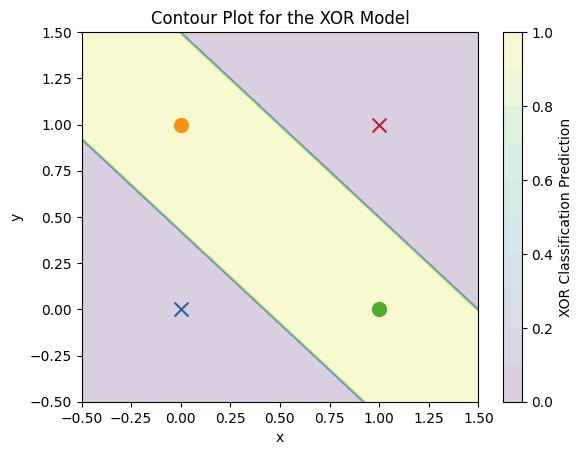

In [52]:
xor_points = [((0, 0), 'x'), ((0, 1), 'o'), ((1, 0), 'o'), ((1, 1), 'x')]
plot_gate_as_contour(model, xor_points, 'XOR')

### 2D-Normal Distribution Data Generation & Classification
+ 랜덤한 여러 종류의 데이터 분류
+ random.multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)

In [73]:
# 참고 : multivatiate_normal 사용
mean = [0, 1] # 변수 각각에 대한 평균 (x1, x2)
cov = [[1, 1],
       [1, 50]]  # covariance matrix (분산)
#[[x1의 분산, x1과 x2의 분산],
#[x1과 x2의 분산, x2의 분산]]
x, y = np.random.multivariate_normal(mean, cov, 5000).T

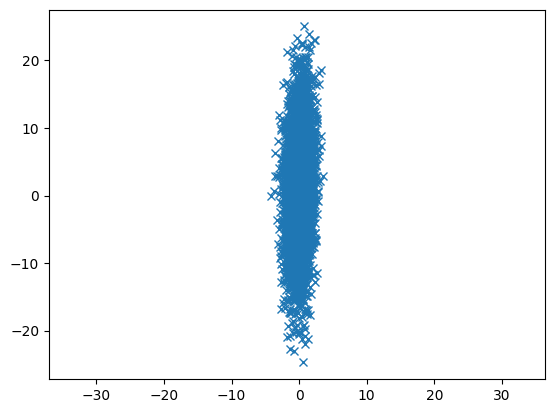

In [74]:
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [75]:
x = np.array([[0, 2], [1, 1], [2, 0]]).T
print(x)
print(np.mean(x, axis=1))
mean = np.mean(x, axis=1)
x_mean = first(mean)
y_mean = second(mean)

xx = x[:1,] - x_mean
yy = x[1:] - y_mean
N = x.shape[1]-1
print(xx)
print(yy)
print(xx * yy)
print(sum((xx*yy).flatten()))
print(N)

cov = sum((xx*yy).flatten()) / N
print(cov)
np.cov(x) # Covariance Matrix

[[0 1 2]
 [2 1 0]]
[1. 1.]
[[-1.  0.  1.]]
[[ 1.  0. -1.]]
[[-1.  0. -1.]]
-2.0
2
-1.0


array([[ 1., -1.],
       [-1.,  1.]])

In [77]:
#1 데이터 만들기
def createData(N=50):
    np.random.seed(1)
    X0 = np.random.multivariate_normal(mean=[0.0, 0.0], cov= [[0.02, 0],
                                                              [0, 0.01]], size=N)
    y_true0 = np.zeros(shape = (N,))

    X1 = np.random.multivariate_normal(mean=[0.0, 0.8], cov= [[0.01, 0],
                                                              [0, 0.01]], size=N)
    y_true1 = np.ones(shape = (N,))

    X2 = np.random.multivariate_normal(mean=[0.3, 0.3], cov= [[0.01, 0],
                                                              [0, 0.01]], size=N)
    y_true2 = np.ones(shape = (N,))*2

    X3 = np.random.multivariate_normal(mean=[0.8, 0.3], cov= [[0.01, 0],
                                                              [0, 0.02]], size=N)
    y_true3 = np.ones(shape = (N,))*3

    X = np.vstack((X0, X1, X2, X3))
    y_true = np.hstack((y_true0, y_true1, y_true2, y_true3))
    return X, y_true

In [81]:
X, y_true = createData()
y_true = tf.keras.utils.to_categorical(y_true) # 'mse', 'categorical_crossentropy'
print("X", X.shape)
print("y_true=", y_true.shape)
print(y_true[0])

X (200, 2)
y_true= (200, 4)
[1. 0. 0. 0.]


In [82]:
#2 모델 만들기
n = 2  # number of neurons in a hidden layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=4, activation='softmax')) # argmax
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 2)                 6         
                                                                 
 dense_12 (Dense)            (None, 4)                 12        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [83]:
#3 configure
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
##model.compile(optimizer=opt,loss='mse', metrics=['accuracy'])
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
##model.compile(optimizer=opt,
##              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [84]:
#4 학습
ret = model.fit(X, y_true, epochs=100, verbose=1) # batch_size=32

Epoch 1/100
7/7 [==============================] - 0s 0s/step - loss: 1.3995 - accuracy: 0.2950
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 1.2382 - accuracy: 0.4300
Epoch 3/100
7/7 [==============================] - 0s 0s/step - loss: 1.1250 - accuracy: 0.5300
Epoch 4/100
7/7 [==============================] - 0s 0s/step - loss: 1.0053 - accuracy: 0.6150
Epoch 5/100
7/7 [==============================] - 0s 0s/step - loss: 0.9322 - accuracy: 0.5950
Epoch 6/100
7/7 [==============================] - 0s 0s/step - loss: 0.8858 - accuracy: 0.6650
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.8379 - accuracy: 0.6650
Epoch 8/100
7/7 [==============================] - 0s 0s/step - loss: 0.8101 - accuracy: 0.6300
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7646 - accuracy: 0.6700
Epoch 10/100
7/7 [==============================] - 0s 0s/step - loss: 0.7211 - accuracy: 0.7100
Epoch 11/100
7/7 [==================

In [85]:
#5 평가
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)

7/7 - 0s - loss: 0.0989 - accuracy: 0.9750 - 79ms/epoch - 11ms/step


In [86]:
#6 예측
y_pred = model.predict(X)
##print("y_pred:", y_pred)
y_label = np.argmax(y_pred, axis = 1)
##print("y_label:", y_label)

7/7 [==============================] - 0s 3ms/step


confusion_matrix(C): tf.Tensor(
[[46  0  4  0]
 [ 0 50  0  0]
 [ 0  0 49  1]
 [ 0  0  0 50]], shape=(4, 4), dtype=int32)
493/493 [==============================] - 0s 543us/step


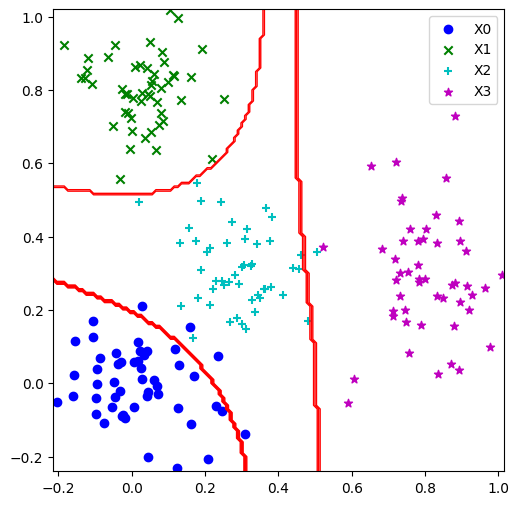

In [88]:
#7 시각화
C = tf.math.confusion_matrix(np.argmax(y_true, axis = 1), y_label)
print("confusion_matrix(C):", C)

#4: calculate the decision boundary
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

markers = "ox+*"
colors  = "bgcm"
labels  = ("X0", "X1", "X2", "X3")
##label = y_true.flatten()          # loss='sparse_categorical_crossentropy'
label = np.argmax(y_true, axis = 1) # loss='mse', 'categorical_crossentropy'
for i, k in enumerate(np.unique(label)):
    plt.scatter(X[label==k, 0], X[label==k, 1],
                c = colors[i], marker=markers[i], label = labels[i])
plt.legend()

h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=1)
plt.show()

In [89]:
#7 시각화2
X0, X1, X2, X3 = np.split(X, 4, axis=0)
print(X0.shape, X1.shape, X2.shape, X3.shape)
params = zip("ox+*", "bgcm", ["X0", "X1", "X2", "X3"])
keys = ['marker', 'color', 'label']
dict_params = [dict(zip(keys, p)) for p in params]

(50, 2) (50, 2) (50, 2) (50, 2)


In [90]:
def plot_points(fig, ax, points, **kargs):
  x, y = np.split(points, 2, axis=1)
  ax.scatter(x, y, **kargs)
  ax.legend()

def plot_result_as_contour(model, model_name='My'):
    x_range = np.linspace(-.5, 1.5, 100)
    y_range = np.linspace(-.5, 1.5, 100)
    x_grid, y_grid = np.meshgrid(x_range, y_range)

    input_data = np.stack([x_grid.flatten(), y_grid.flatten()], axis=-1)
    z = model.predict(input_data)
    z_1d = np.argmax(z, axis = 1) if 1 < z.shape[1] else np.round(z)
    print(x_grid.shape, y_grid.shape, input_data.shape, z.shape, z_1d.shape)
    z_grid = z_1d.reshape(x_grid.shape)

    plt.contourf(x_grid, y_grid, z_grid, levels=10, alpha=.2)
    plt.colorbar(label='{:} Classification Prediction'.format(model_name))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Contour Plot for the {:} Model'.format(model_name))

    plt.show()

313/313 [==============================] - 0s 541us/step
(100, 100) (100, 100) (10000, 2) (10000, 4) (10000,)


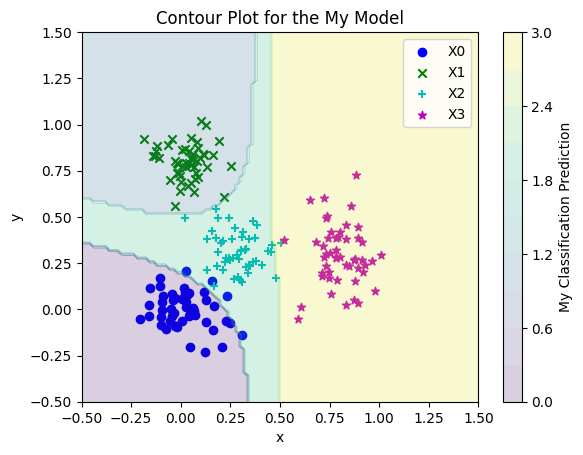

In [91]:
fig, ax = plt.subplots()
for x, p in zip([X0, X1, X2, X3], dict_params):
  plot_points(fig, ax, x, **p)

plot_result_as_contour(model)

### IRIS Classification

In [92]:
import pandas as pd

In [101]:
#1 데이터 만들기
def load_Iris(shuffle=True):
    label={'setosa':0, 'versicolor':1, 'virginica':2}
    fileName = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
    df = pd.read_csv(fileName, header=0, converters={4: lambda name: label[name]})
    data = df.values
    if shuffle:
        np.random.shuffle(data)
    return data

In [102]:
iris_data = load_Iris()
X      = iris_data[:,:-1]
y_true = iris_data[:, -1]

print("X.shape:", X.shape)
print("y_true.shape:", y_true.shape)
print(X[:3])
print(y_true[:3])

X.shape: (150, 4)
y_true.shape: (150,)
[[6.5 2.8 4.6 1.5]
 [6.5 3.  5.5 1.8]
 [7.7 3.8 6.7 2.2]]
[1. 2. 2.]


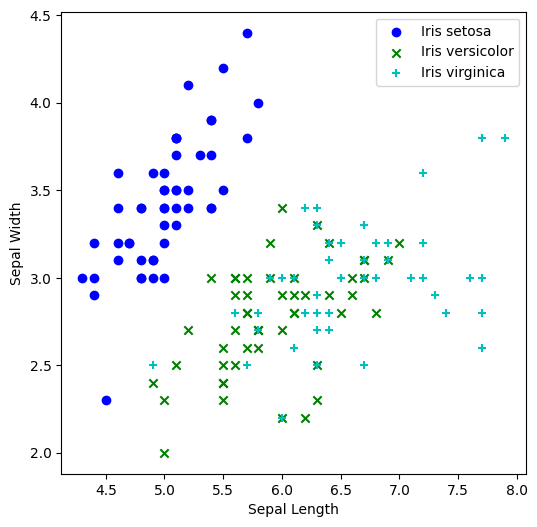

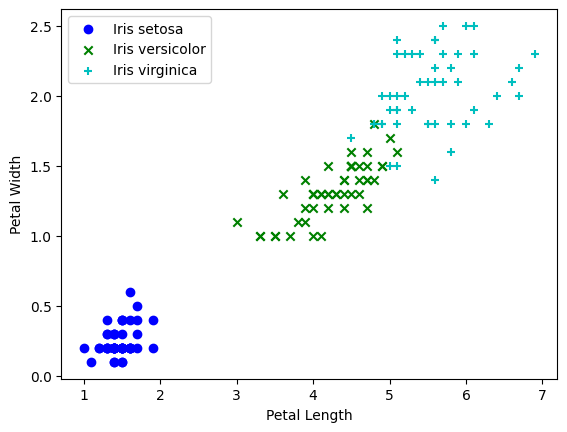

In [103]:
#1-1 데이터 확인
markers= "ox+*sd"
colors = "bgcmyk"
labels = ["Iris setosa","Iris versicolor", "Iris virginica"]

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
for i, k in enumerate(np.unique(y_true)):
  plt.scatter(X[y_true== k, 0], # Sepal Length
              X[y_true== k, 1], # Sepal Width
              c=colors[i], marker=markers[i], label=labels[i])
plt.legend(loc='best')
plt.show()

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
for i, k in enumerate(np.unique(y_true)):
  plt.scatter(X[y_true== k, 2], # Petal Length
              X[y_true== k, 3], # Petal Width
              c=colors[i], marker=markers[i], label=labels[i])
plt.legend(loc='best')
plt.show()

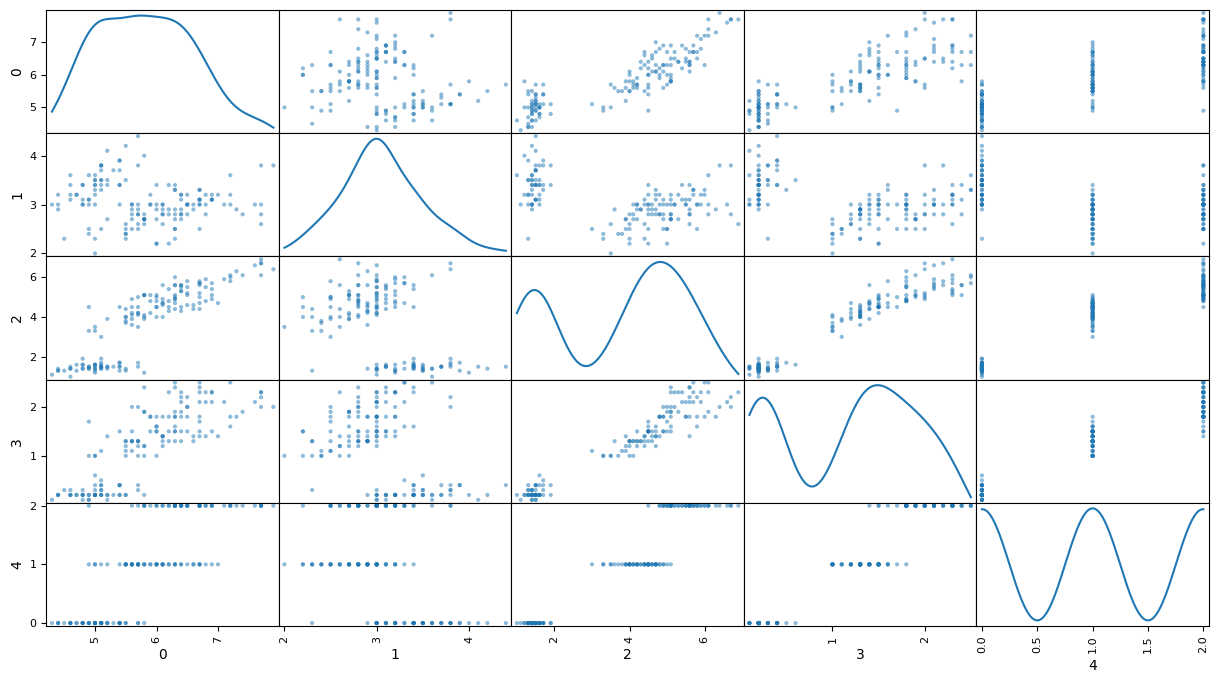

In [121]:
from pandas.plotting import scatter_matrix
df = pd.DataFrame(iris_data)
scatter_matrix(df, alpha=0.5, figsize=(15, 8), diagonal='kde')
plt.show()

In [107]:
# train, test 데이터 분리
def train_test_data_set(iris_data, test_rate=0.2): # train: 0.8, test: 0.2
    n = int(iris_data.shape[0]*(1-test_rate))
    x_train = iris_data[:n,:-1]
    y_train = iris_data[:n, -1]

    x_test = iris_data[n:,:-1]
    y_test = iris_data[n:,-1]
    return (x_train, y_train), (x_test, y_test)

In [108]:
iris_data = load_Iris(shuffle=True)
(x_train, y_train), (x_test, y_test) = train_test_data_set(iris_data, test_rate=0.2)
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_test.shape:",  x_test.shape)
print("y_test.shape:",  y_test.shape)

x_train.shape: (120, 4)
y_train.shape: (120,)
x_test.shape: (30, 4)
y_test.shape: (30,)


In [109]:
# one-hot encoding: 'mse', 'categorical_crossentropy'
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [110]:
#2 모델 만들기
n = 2  # number of neurons in a hidden layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_dim=4, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 2)                 10        
                                                                 
 dense_14 (Dense)            (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [111]:
#3 configure
def MSE(y, t):
    return tf.reduce_mean(tf.square(y - t)) # (y - t)**2

CCE = tf.keras.losses.CategoricalCrossentropy()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
##model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
##model.compile(optimizer=opt, loss= MSE, metrics=['accuracy'])
##model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=opt, loss= CCE, metrics=['accuracy'])

In [113]:
#4 학습
ret = model.fit(x_train, y_train, epochs=100, verbose=1) # batch_size=32

Epoch 1/100
4/4 [==============================] - 0s 997us/step - loss: 0.2900 - accuracy: 0.9750
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2857 - accuracy: 0.9667
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.9667
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2807 - accuracy: 0.9750
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2786 - accuracy: 0.9667
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2705 - accuracy: 0.9750
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2686 - accuracy: 0.9750
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2651 - accuracy: 0.9667
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2679 - accuracy: 0.9583
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2574 - accuracy: 0.9667
Epoch 11/100
4/4 [=========

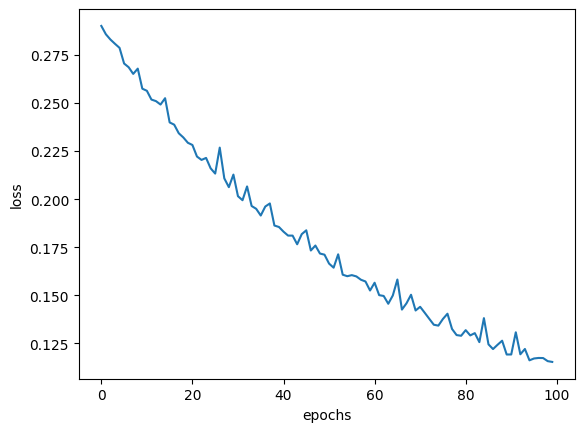

In [114]:
# 확인
loss = ret.history['loss']
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [115]:
#5 평가하기
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
y_pred = model.predict(x_train)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(np.argmax(y_train, axis = 1), y_label)
print("confusion_matrix(C):", C)

4/4 - 0s - loss: 0.1209 - accuracy: 0.9667 - 88ms/epoch - 22ms/step
1/1 - 0s - loss: 0.0803 - accuracy: 1.0000 - 16ms/epoch - 16ms/step
4/4 [==============================] - 0s 998us/step
confusion_matrix(C): tf.Tensor(
[[38  0  0]
 [ 0 40  1]
 [ 0  3 38]], shape=(3, 3), dtype=int32)


explained variance ratio (first two components): [0.92461872 0.05306648]


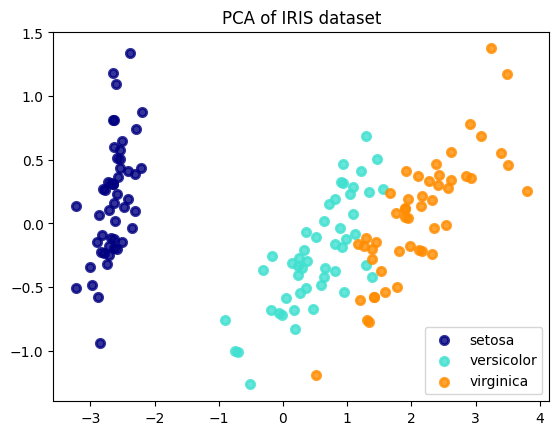

In [124]:
# 싸이킷런 사용하기
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")
plt.show()